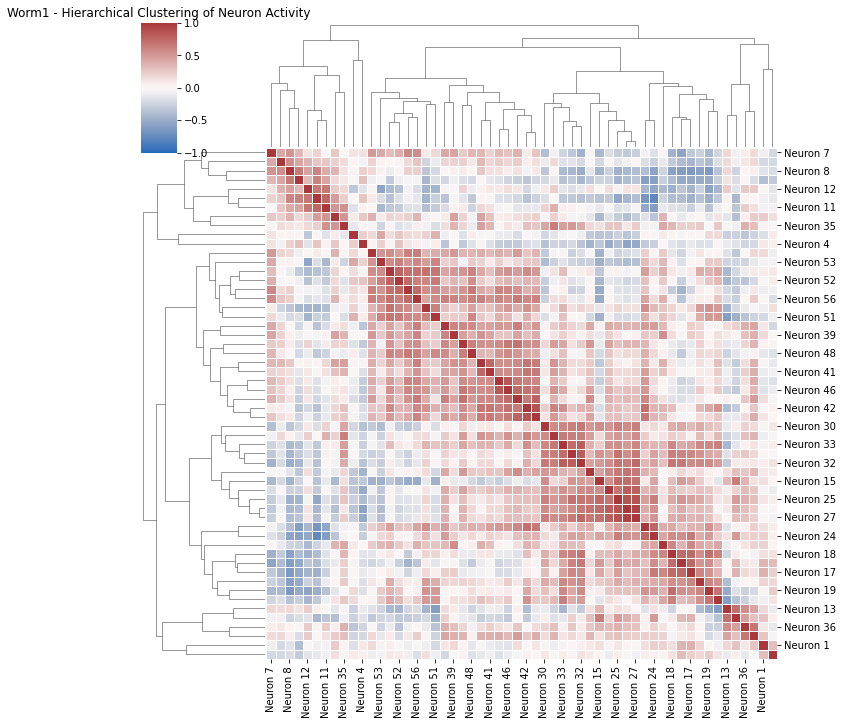

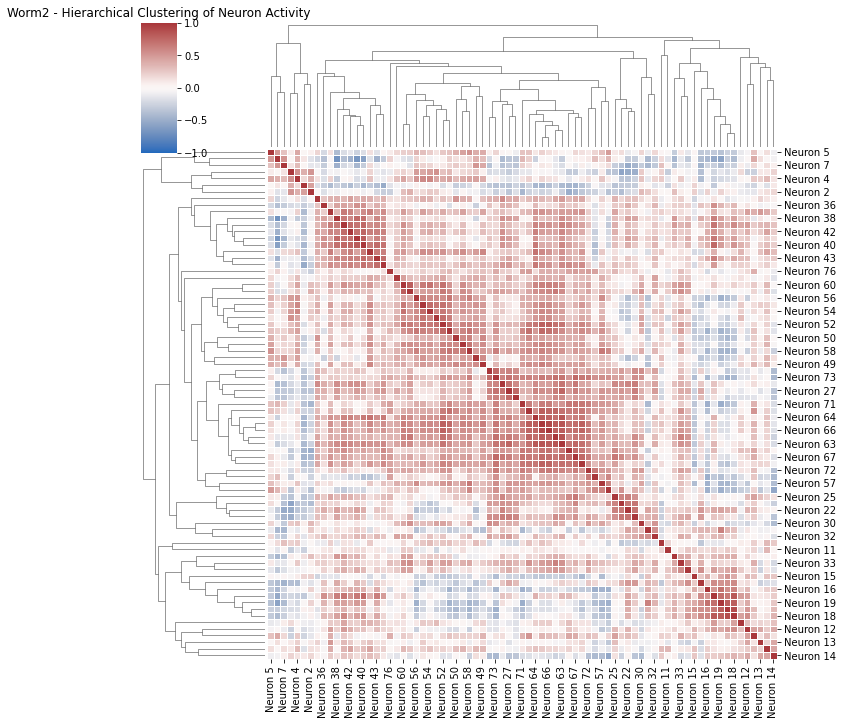

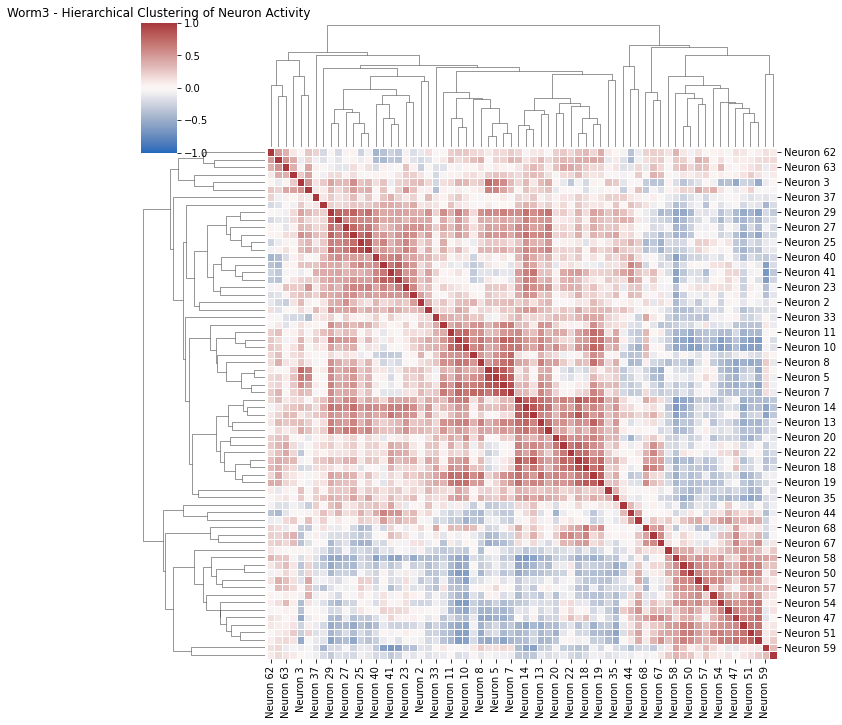

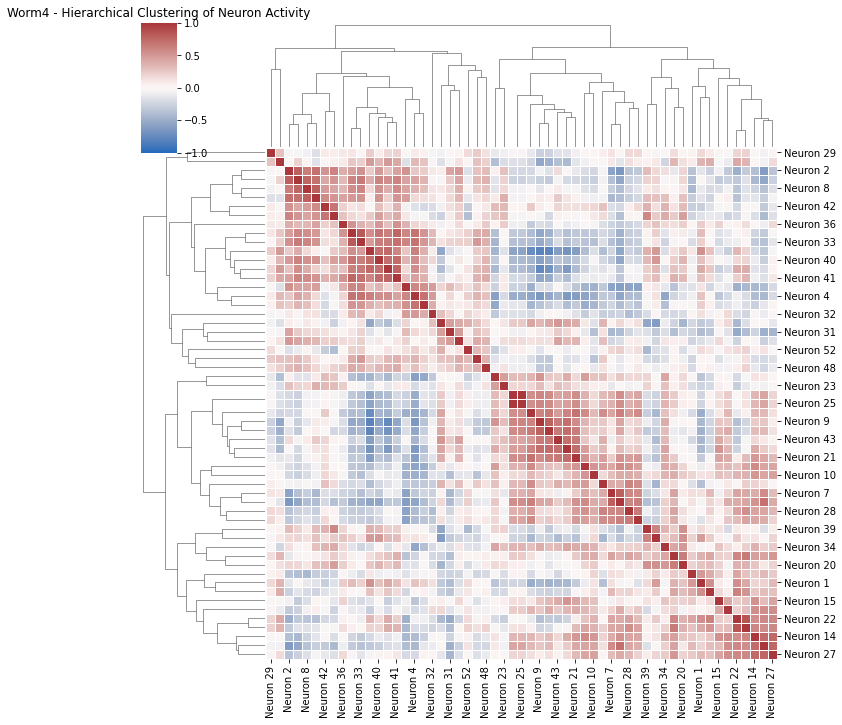

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

# Load the Excel file
file_path = 'D:/computational neuroscince/NeuroAI/project/data/pnas.1507110112.sd01.xls'
sheets = ['Worm1', 'Worm2', 'Worm3', 'Worm4'] 

data = {sheet: pd.read_excel(file_path, sheet_name=sheet) for sheet in sheets}

# Function to extract neuron activity and compute correlation
def compute_correlation(df):
    # Extract neuron activity columns (columns E to the last column)
    neuron_data = df.iloc[:, 4:]  # Assuming neurons start from column 5 (index 4 in zero-indexing)
    
    # Normalize neuron data if needed (uncomment if necessary)
    # neuron_data = (neuron_data - neuron_data.min()) / (neuron_data.max() - neuron_data.min())
    
    # Compute correlation matrix
    correlation_matrix = neuron_data.corr(method='pearson')
    
    # Ensure correlation matrix is between -1 and 1 (optional step, usually unnecessary for Pearson)
    correlation_matrix = np.clip(correlation_matrix, -1, 1)
    
    return correlation_matrix

# Compute correlation matrices for each worm
correlation_matrices = {sheet: compute_correlation(data[sheet]) for sheet in sheets}

# Function to plot hierarchical clustering of correlation matrix
def plot_hierarchical_clustering(correlation_matrix, worm_name):
    # Compute the linkage matrix for hierarchical clustering
    linkage_matrix = linkage(squareform(1 - correlation_matrix), method='average')
    
    # Create a cluster map with seaborn, normalizing the color scale between -1 and +1
    sns.clustermap(correlation_matrix, row_linkage=linkage_matrix, col_linkage=linkage_matrix,
                   cmap='vlag', center=0, vmin=-1, vmax=1, linewidths=.75, figsize=(10, 10))
    
    plt.title(f'{worm_name} - Hierarchical Clustering of Neuron Activity')
    plt.show()

# Plot correlation and hierarchical clustering for each worm
for sheet in sheets:
    plot_hierarchical_clustering(correlation_matrices[sheet], sheet)
